## Video Demonstration
https://youtu.be/bUm62iO9DWU


## Introduction and objective ##

The project aims to analyze data measured from athletes to help strength coaches identify correlations between specific metrics and athlete performance based on gender, stroke, and training group. By calculating average scores and identifying dominant metrics, the project provides insights into the factors influencing athlete performance. This analysis can assist coaches in tailoring training programs and strategies to improve athlete performance effectively.

The project analyzes and evaluates the performance of male and female swim athletes based on various metrics across different stroke groups and groups. It calculates the average score for each metric in each group by multiplying the metric's average value in the group by its weight, identifying the most dominant metric for each group. Additionally, the project calculates statistics such as the maximum, minimum, and average values for each metric in each group and stroke group, providing valuable insights into the athletes' performance and the impact of different metrics on their overall performance.


## Data description ##
This dataset contains information gathered from Counter Movement Jumps (CMJs) conducted throughout the year. The data includes various measurements
Here is a description of each column in the data:

1. **Name**: The name of the individual or entity associated with the data.
2. **ExternalId**: An external identifier associated with the data entry.
3. **Test Type**: The type of test or measurement conducted.
4. **Date**: The date when the test was conducted.
5. **Time**: The time when the test was conducted.
6. **BW [KG]**: Body weight in kilograms.
7. **Reps**: The number of repetitions performed during the test.
8. **Tags**: Additional tags or labels associated with the data entry.
9. **Additional Load [lb]**: Additional load or weight applied during the test, measured in pounds.
10. **Jump Height (Imp-Mom) in Inches [in]**: Jump height measured in inches using impulse-momentum.
11. **RSI-modified (Imp-Mom) [m/s]**: Modified Reactive Strength Index measured in meters per second using impulse-momentum.
12. **Eccentric Peak Force [N]**: Peak force during the eccentric phase of a movement, measured in Newtons.
13. **Eccentric Peak Power / BM [W/kg]**: Peak power during the eccentric phase of a movement normalized to body mass, measured in watts per kilogram.
14. **Eccentric Duration [ms]**: Duration of the eccentric phase of a movement, measured in milliseconds.
15. **Concentric Peak Force [N]**: Peak force during the concentric phase of a movement, measured in Newtons.
16. **Concentric Peak Force / BM [N/kg]**: Peak force during the concentric phase of a movement normalized to body mass, measured in Newtons per kilogram.
17. **Concentric Duration [ms]**: Duration of the concentric phase of a movement, measured in milliseconds.

This dataset provides valuable insights into the performance and characteristics of individuals performing CMJs, which can be used for further analysis and research in the field of sports science and biomechanics.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('modified_forcedecks.csv')


## Data preprocessing ##
This Python code snippet demonstrates how to create a dictionary where unique names from a DataFrame column are used as keys, and integers starting from 1 are used as values. This can be useful for mapping names to numerical identifiers.

In [97]:
import pandas as pd

# Assuming df is your DataFrame and "Name" is the column containing the names
names = df['Name'].unique()

# Create a dictionary with names as keys and integers starting from 1 as values
name_dict = {name: i+1 for i, name in enumerate(names)}


### Method to find an athlete from their name ID

In [98]:
def get_key_from_value(dictionary, search_value):
    for key, value in dictionary.items():
        if value == search_value:
            return key
    return None

Below we created multiple dictionaries to add additional data to group the athletes. This allowed athletes to be grouped based on the events they competed in (stroke and distance). This was then added to the data frame.

In [99]:

fly_dict={1 : 1 ,
2 : 0 ,
3 : 0 ,
4 : 1 ,
5 : 0 ,
6 : 1 ,
7 : 1 ,
8 : 0 ,
9 : 0 ,
10 : 1 ,
11 : 0 ,
12 : 0 ,
13 : 0 ,
14 : 0 ,
15 : 0 ,
16 : 0 ,
17 : 0 ,
18 : 1 ,
19 : 0 ,
20 : 0 ,
21 : 1 ,
22 : 1 ,
23 : 1 ,
24 : 0 ,
25 : 0 ,
26 : 1 ,
27 : 0 ,
28 : 1 ,
29 : 1 ,
30 : 1 ,
31 : 1 ,
32 : 0 ,
33 : 1 ,
34 : 1 ,
35 : 0 ,
36 : 0 ,
37 : 1 ,
38 : 1 ,
39 : 0 ,
40 : 0 ,
41 : 0 ,
42 : 0 ,
43 : 0 ,
44 : 1 ,
45 : 1 ,
46 : 1 }


#Determining if an athlete swims fly
df['Fly'] = df['Name'].map(fly_dict)

In [100]:
back_dict={1 : 0 ,
2 : 1 ,
3 : 0 ,
4 : 0 ,
5 : 0 ,
6 : 0 ,
7 : 0 ,
8 : 0 ,
9 : 0 ,
10 : 0 ,
11 : 1 ,
12 : 0 ,
13 : 0 ,
14 : 0 ,
15 : 1 ,
16 : 0 ,
17 : 0 ,
18 : 1 ,
19 : 0 ,
20 : 1 ,
21 : 0 ,
22 : 1 ,
23 : 0 ,
24 : 1 ,
25 : 0 ,
26 : 0 ,
27 : 1 ,
28 : 1 ,
29 : 1 ,
30 : 1 ,
31 : 0 ,
32 : 0 ,
33 : 1 ,
34 : 0 ,
35 : 0 ,
36 : 0 ,
37 : 0 ,
38 : 0 ,
39 : 0 ,
40 : 0 ,
41 : 0 ,
42 : 0 ,
43 : 0 ,
44 : 0 ,
45 : 0 ,
46 : 0 }
#Determining if an athlete swims fly
df['Back'] = df['Name'].map(back_dict)

In [101]:
breast_dict={1 : 1 ,
2 : 0 ,
3 : 1 ,
4 : 0 ,
5 : 0 ,
6 : 1 ,
7 : 0 ,
8 : 0 ,
9 : 0 ,
10 : 0 ,
11 : 0 ,
12 : 1 ,
13 : 0 ,
14 : 0 ,
15 : 0 ,
16 : 1 ,
17 : 1 ,
18 : 0 ,
19 : 1 ,
20 : 0 ,
21 : 0 ,
22 : 0 ,
23 : 0 ,
24 : 0 ,
25 : 0 ,
26 : 0 ,
27 : 0 ,
28 : 0 ,
29 : 0 ,
30 : 0 ,
31 : 0 ,
32 : 0 ,
33 : 0 ,
34 : 0 ,
35 : 1 ,
36 : 1 ,
37 : 0 ,
38 : 0 ,
39 : 0 ,
40 : 1 ,
41 : 1 ,
42 : 0 ,
43 : 0 ,
44 : 0 ,
45 : 0 ,
46 : 0 }

#Determining if an athlete swims fly
df['Breast'] = df['Name'].map(breast_dict)

In [102]:
free_dict={1 : 1 ,
2 : 0 ,
3 : 0 ,
4 : 1 ,
5 : 1 ,
6 : 0 ,
7 : 1 ,
8 : 1 ,
9 : 1 ,
10 : 1 ,
11 : 1 ,
12 : 0 ,
13 : 0 ,
14 : 1 ,
15 : 1 ,
16 : 0 ,
17 : 0 ,
18 : 1 ,
19 : 0 ,
20 : 1 ,
21 : 1 ,
22 : 1 ,
23 : 1 ,
24 : 1 ,
25 : 1 ,
26 : 1 ,
27 : 1 ,
28 : 1 ,
29 : 1 ,
30 : 1 ,
31 : 0 ,
32 : 1 ,
33 : 1 ,
34 : 1 ,
35 : 0 ,
36 : 0 ,
37 : 1 ,
38 : 1 ,
39 : 1 ,
40 : 1 ,
41 : 1 ,
42 : 1 ,
43 : 0 ,
44 : 1 ,
45 : 1 ,
46 : 1 }


#Determining if an athlete swims fly
df['Free'] = df['Name'].map(free_dict)

In [103]:
group_dict={1 : 2 ,
2 : 2 ,
3 : 2 ,
4 : 2 ,
5 : 1 ,
6 : 3 ,
7 : 3 ,
8 : 3 ,
9 : 1 ,
10 : 2 ,
11 : 2 ,
12 : 3 ,
13 : 2 ,
14 : 1 ,
15 : 3 ,
16 : 3 ,
17 : 2 ,
18 : 3 ,
19 : 3 ,
20 : 2 ,
21 : 1 ,
22 : 3 ,
23 : 3 ,
24 : 2 ,
25 : 3 ,
26 : 3 ,
27 : 3 ,
28 : 3 ,
29 : 3 ,
30 : 3 ,
31 : 2 ,
32 : 2 ,
33 : 3 ,
34 : 1 ,
35 : 3 ,
36 : 1 ,
37 : 2 ,
38 : 1 ,
39 : 1 ,
40 : 3 ,
41 : 2 ,
42 : 1 ,
43 : 3 ,
44 : 3 ,
45 : 3 ,
46 : 3 }

#assigning the group of each athlete
df['Group'] = df['Name'].map(group_dict)
""" 1: distance,
    2: mid distance,
    3: sprint,"""

' 1: distance,\n    2: mid distance,\n    3: sprint,'

In [104]:
medley_dict={1 : 1 ,
2 : 0 ,
3 : 1 ,
4 : 1 ,
5 : 1 ,
6 : 1 ,
7 : 0 ,
8 : 0 ,
9 : 0 ,
10 : 1 ,
11 : 1 ,
12 : 1 ,
13 : 1 ,
14 : 0 ,
15 : 0 ,
16 : 1 ,
17 : 1 ,
18 : 1 ,
19 : 1 ,
20 : 0 ,
21 : 0 ,
22 : 1 ,
23 : 0 ,
24 : 1 ,
25 : 0 ,
26 : 0 ,
27 : 0 ,
28 : 0 ,
29 : 0 ,
30 : 0 ,
31 : 1 ,
32 : 0 ,
33 : 1 ,
34 : 0 ,
35 : 0 ,
36 : 0 ,
37 : 0 ,
38 : 0 ,
39 : 0 ,
40 : 1 ,
41 : 1 ,
42 : 0 ,
43 : 0 ,
44 : 0 ,
45 : 0 ,
46 : 1 }

#Determining if an athlete swims fly
df['IM'] = df['Name'].map(medley_dict)

In [105]:
male_dict={1 : 0 ,
2 : 0 ,
3 : 0 ,
4 : 1 ,
5 : 1 ,
6 : 1 ,
7 : 0 ,
8 : 0 ,
9 : 0 ,
10 : 1 ,
11 : 1 ,
12 : 1 ,
13 : 0 ,
14 : 0 ,
15 : 0 ,
16 : 1 ,
17 : 0 ,
18 : 1 ,
19 : 1 ,
20 : 1 ,
21 : 0 ,
22 : 1 ,
23 : 1 ,
24 : 1 ,
25 : 0 ,
26 : 0 ,
27 : 0 ,
28 : 0 ,
29 : 1 ,
30 : 1 ,
31 : 0 ,
32 : 1 ,
33 : 1 ,
34 : 0 ,
35 : 0 ,
36 : 1 ,
37 : 1 ,
38 : 1 ,
39 : 1 ,
40 : 0 ,
41 : 1 ,
42 : 1 ,
43 : 0 ,
44 : 0 ,
45 : 0 ,
46 : 1 }

#assigning the gender of each athlete
df['Male'] = df['Name'].map(male_dict)

In [106]:
# Replace the values in the "Name" column with the integers from the dictionary
#df['Name'] = df['Name'].replace(name_dict)

#noMaxRSI_df=df #datafram with no max RSI values


### Create a df with only highest RSI for each athlete

In [107]:
# Get the indices of the rows with the maximum 'RSI-modified (Imp-Mom) [m/s]' value for each name
max_indices = df.groupby('Name')["RSI-modified (Imp-Mom) [m/s] "].idxmax()

# Select only the rows with the maximum 'RSI-modified (Imp-Mom) [m/s]' value for each name
df_rsi = df.loc[max_indices]

df=df_rsi

In [108]:
# Drop the specified columns
df = df.drop(columns=["Test Type", "Tags", "Date", "Time","ExternalId", "Additional Load [lb]", "Reps"])


In [109]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define columns to be normalized (excluding 'Name' column)
columns_to_normalize = [col for col in df.columns if col not in ['Name', 'Male', 'Group', 'Fly', 'Back', 'Breast', 'Free', 'IM']]

#keep a copy of the original dataframe
df_original = df.copy()



## Histograms to analyse distribution

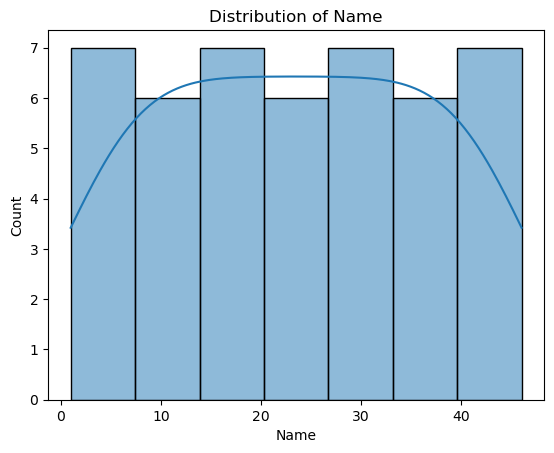

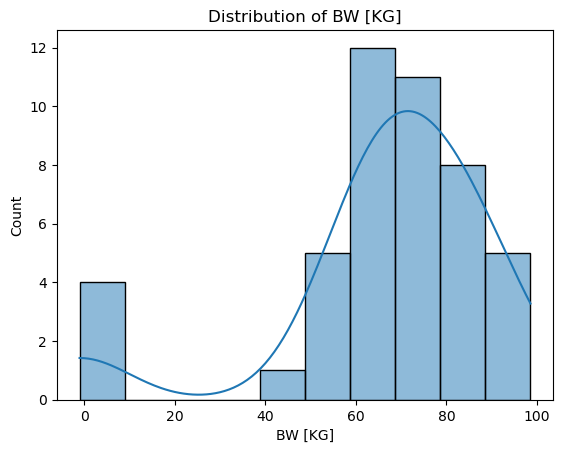

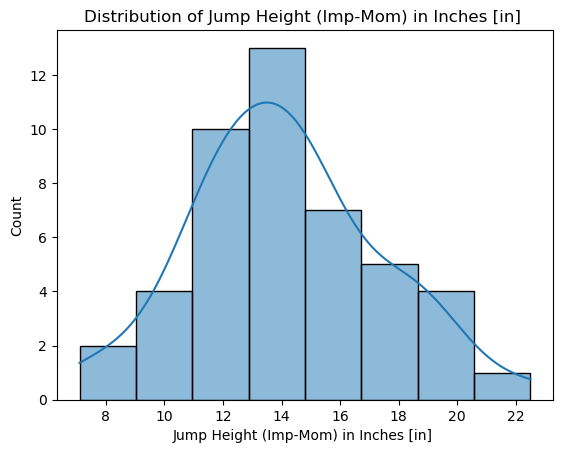

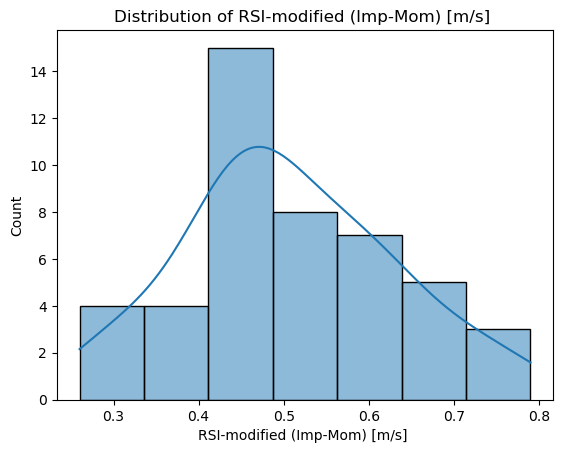

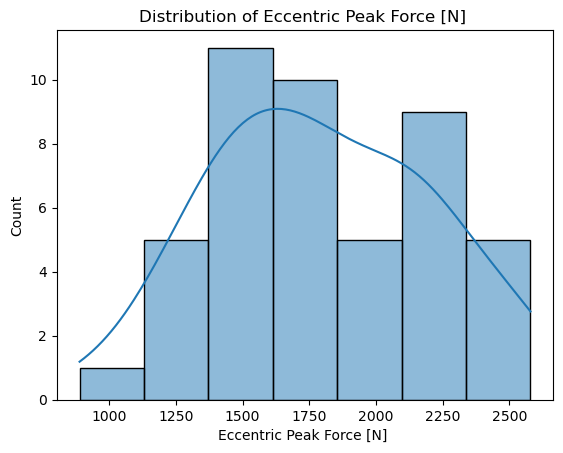

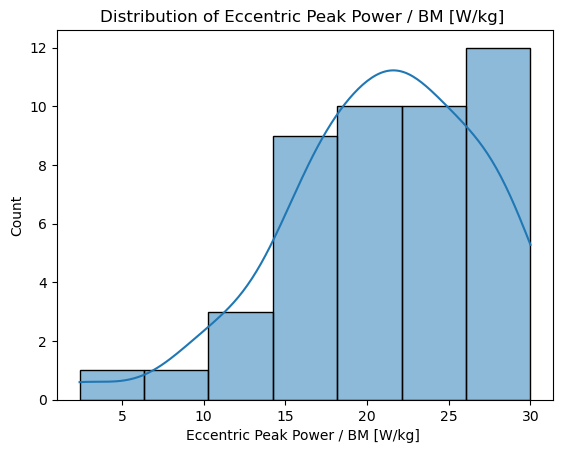

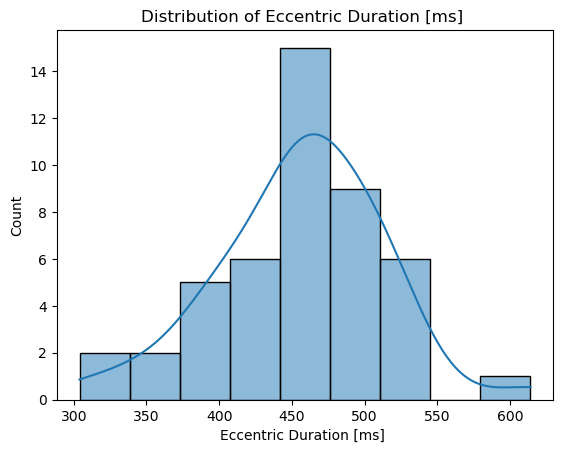

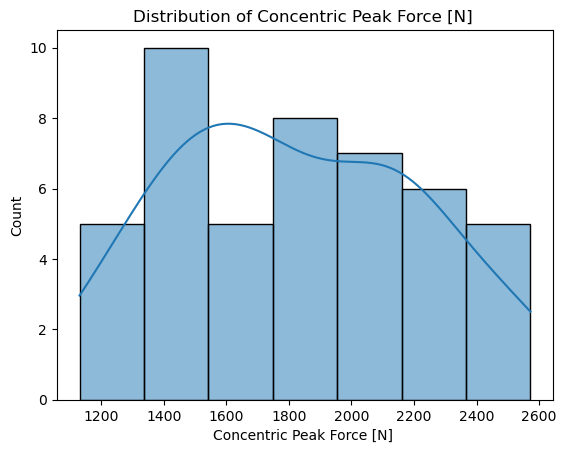

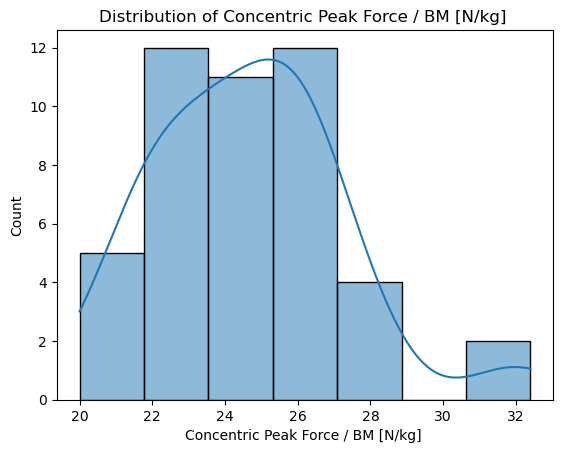

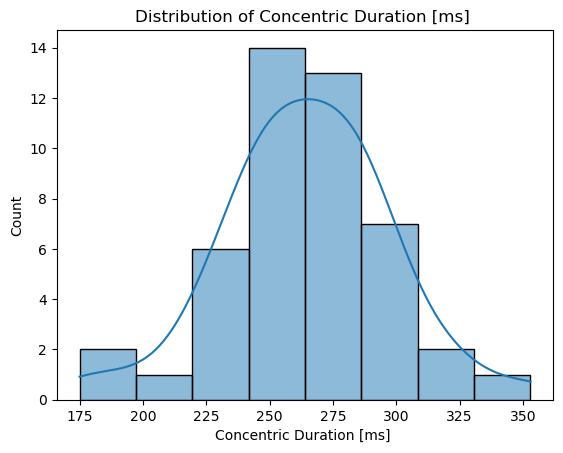

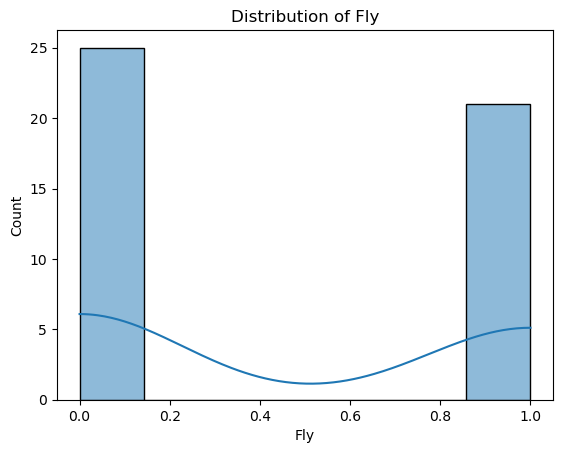

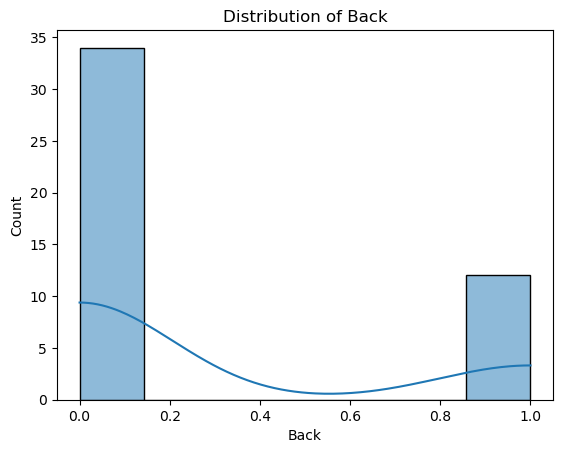

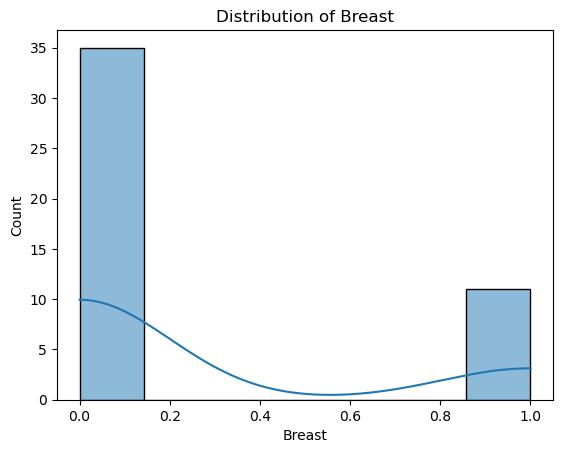

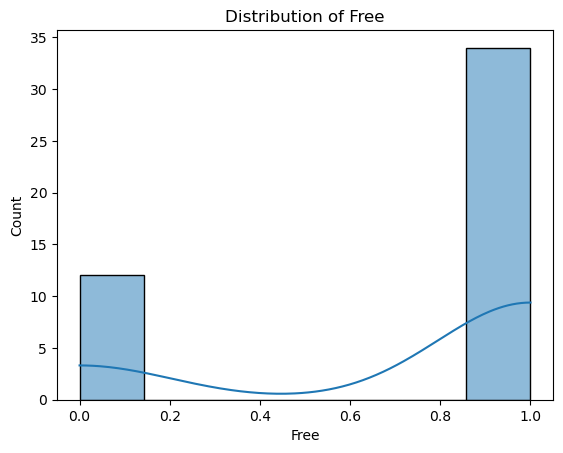

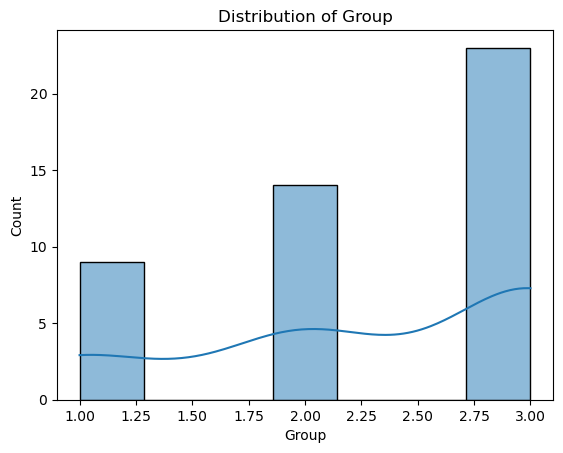

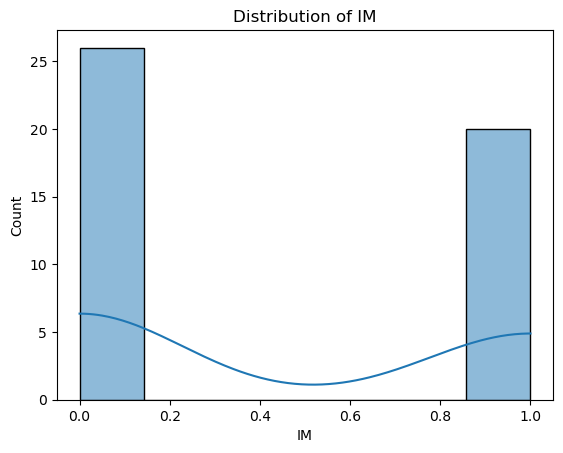

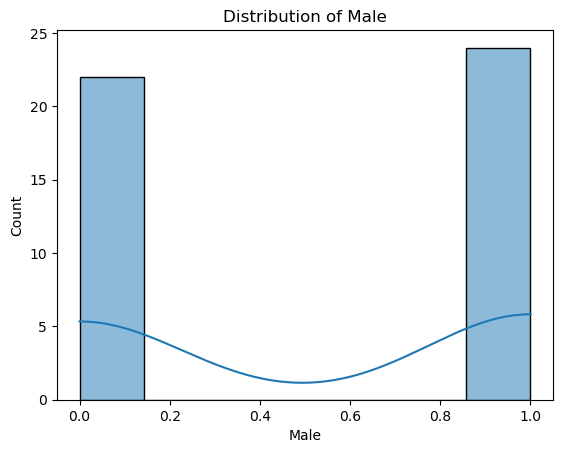

In [110]:
for feature in df.columns.tolist():
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Most of the histograms that are not binaries or "Names" do resemble a normal curve with most data in the center with fewer data points on either end of the center of the data. The line also looks like the bell shape of a bell curve.  

## The architectural model (pipeline) used ##
## Create Clusters

In [111]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Create the KMeans classifier with 5 clusters
kmeans = KMeans(n_clusters=7, random_state=42,n_init=10)

# Fit the model to the scaled data
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_


## Testing accuracy of the code by predicting testing data

In [112]:
## Create test data
Xtest = df.drop('cluster', axis=1)

# Get the actual values of y
y_actual = list(df['cluster'])
print("y_actual: ", y_actual)

# Use the kmeans model to predict
y_pred = list(kmeans.predict(Xtest))
print("y_pred:   ", y_pred)

# Count occurrences that the model was wrong
count = 0
for i in range(len(y_actual)):
 if y_actual[i] != y_pred[i]:
  count = count + 1

# Calculate the accuracy with the count
accuracy = (len(y_actual) - count) / len(y_actual)
print("Accuracy: ", accuracy)

y_actual:  [6, 3, 3, 5, 6, 3, 0, 6, 5, 0, 4, 1, 5, 0, 2, 4, 3, 1, 6, 6, 3, 1, 1, 3, 2, 2, 2, 3, 4, 6, 0, 1, 1, 3, 2, 4, 1, 1, 4, 2, 2, 1, 3, 3, 0, 2]
y_pred:    [6, 3, 3, 5, 6, 3, 0, 6, 5, 0, 4, 1, 5, 0, 2, 4, 3, 1, 6, 6, 3, 1, 1, 3, 2, 2, 2, 3, 4, 6, 0, 1, 1, 3, 2, 4, 1, 1, 4, 2, 2, 1, 3, 3, 0, 2]
Accuracy:  1.0


This shows that the model was 100% accurate when predicting the training data. This would most likely not be 100% if we were using testing data to test the accuracy. 

In [113]:

grouped = df.groupby('cluster')

# Open a file in append mode
with open('output.txt', 'w') as f:
    # Iterate over each cluster
    for cluster_label, cluster_data in grouped:
        print(f"Cluster {cluster_label}:",file=f)
        # Print the names in the cluster
        print ("Athletes",file=f)
        for name in cluster_data['Name']:
            print(get_key_from_value(name_dict, name),file=f)
        print('',file=f)
        # Calculate the mean of each numerical column
        means = cluster_data.drop(columns=['cluster']).mean()
        print("Mean:",file=f)
        print(means,file=f)
        
        # Calculate the median of each numerical column
        medians = cluster_data.drop(columns=['cluster']).median()
        print("Median:",file=f)
        print(medians,file=f)
        
        # Calculate the male and female counts
        male_count = cluster_data['Male'].sum()
        female_count = cluster_data['Male'].count() - male_count
        
        print(f"Male count: {male_count}",file=f)
        print(f"Female count: {female_count}",file=f)
        
        print('',file=f)

## Assumptions verification ##
Below are the weights that we will be using to determine the total score of each athlete based on their normalised values for each of the metrics. These weigths were given to us by teh client based on what metrics they deemed to be most importan to athletic success.

In [114]:
# Define weights for each metric based on their importance
weights = {
    'Jump Height (Imp-Mom) in Inches [in] ': 0.15,
    'RSI-modified (Imp-Mom) [m/s] ': 0.3,
    'Eccentric Peak Force [N] ': 0.075,
    'Eccentric Peak Power / BM [W/kg] ': 0.125,
    'Eccentric Duration [ms] ': 0.075,
    'Concentric Peak Force [N] ': 0.075,
    'Concentric Peak Force / BM [N/kg] ': 0.125,
    'Concentric Duration [ms] ': 0.075,
}

# Function to calculate the score for each athlete based on the metrics and weights
def calculate_score(row):
    score = sum(row[metric] * weight for metric, weight in weights.items())
    return score

## Model implementation ##
## Calculating the best athlete in each cluster

In [115]:
# Open a file in append mode
with open('output.txt', 'a') as f:
    # Iterate over each cluster DataFrame and find the top athlete
    for cluster_label, cluster_data in grouped:
        print(f"Cluster {cluster_label+1}:", file=f)
        
        # Calculate the score for each athlete
        cluster_data['Score'] = cluster_data.apply(calculate_score, axis=1)
        
        # Sort the athletes based on their scores
        cluster_data_sorted = cluster_data.sort_values(by='Score', ascending=False)
        
        # Get the top 2 athletes
        top_2_athletes = cluster_data_sorted.head(2)
        
        # Print the top 2 athletes
        for _, top_athlete in top_2_athletes.iterrows():
            athlete_name = get_key_from_value(name_dict, top_athlete["Name"])
            print("Top Athlete:", file=f)
            print(f"Name: {athlete_name}", file=f)
            print(top_athlete, file=f)
            print("", file=f)


## Plotting the highest weighed categories against each other to see differences in athletes

Color was used to indicate the cluster to hopefully show separation based on these categories.

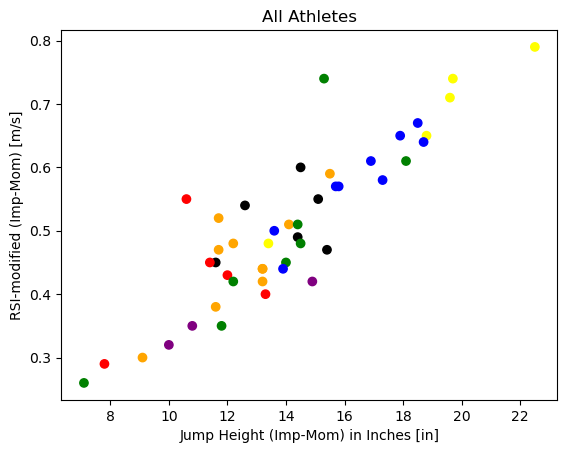

In [116]:
# Convert cluster numbers into colors for visualization
colordf = df.copy()
colordf.loc[colordf['cluster'] == 0, 'cluster'] = 'red'
colordf.loc[colordf['cluster'] == 1, 'cluster'] = 'blue'
colordf.loc[colordf['cluster'] == 2, 'cluster'] = 'green'
colordf.loc[colordf['cluster'] == 3, 'cluster'] = 'orange'
colordf.loc[colordf['cluster'] == 4, 'cluster'] = 'yellow'
colordf.loc[colordf['cluster'] == 5, 'cluster'] = 'purple'
colordf.loc[colordf['cluster'] == 6, 'cluster'] = 'black'

# Print the scatterplot with the colors
plt.scatter(df['Jump Height (Imp-Mom) in Inches [in] '], df['RSI-modified (Imp-Mom) [m/s] '], c=colordf.cluster)
plt.title("All Athletes")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

With the color added to the scatter plot, it is easy to visualize the clusters. Some clusters separate better than other with an example being Yellow (cluster 4) on the top right. While others are bad at separating such as Green (cluster 2) as it covers a vast majority of the graph. In this, the other components that where left out of this graph probably better help to distinguish the clusters. 

## Visualizing the difference in the most important metrics of each cluster

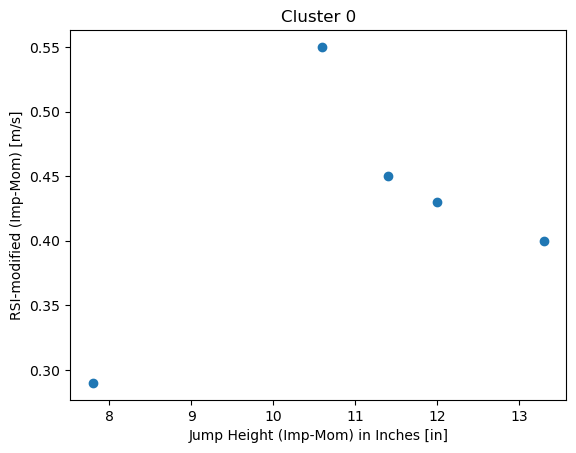

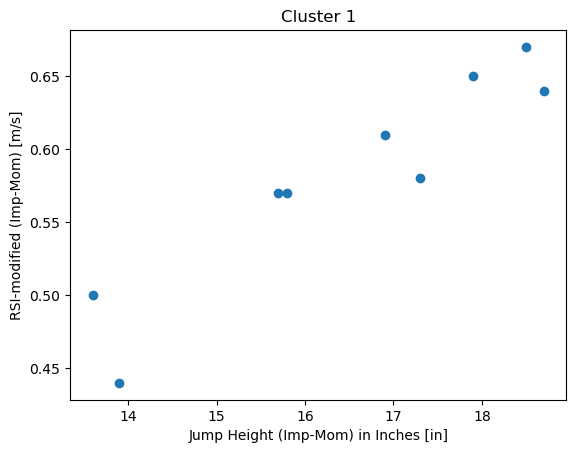

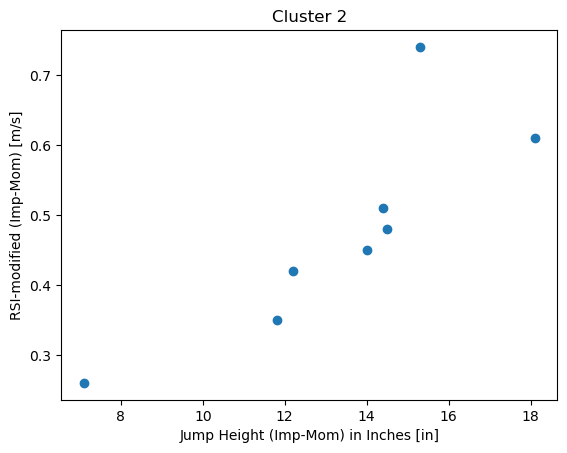

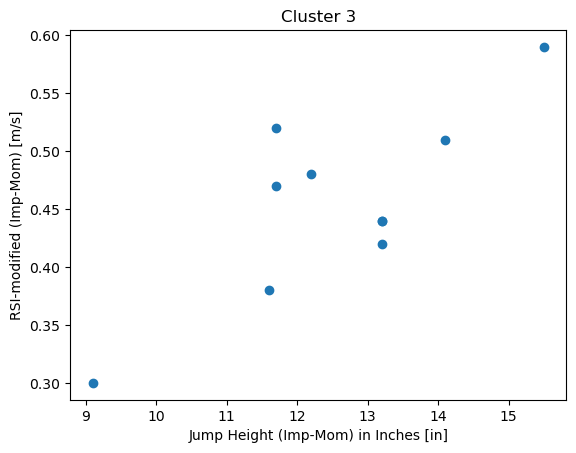

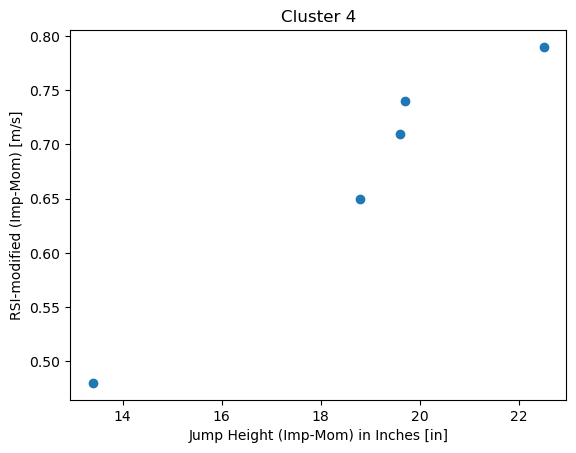

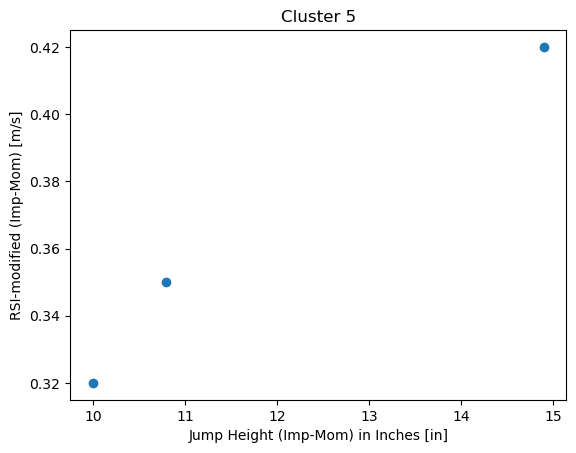

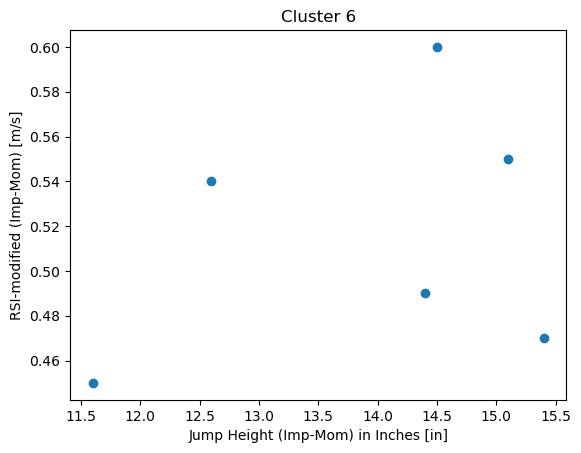

In [117]:
# Separate clusters into different dfs
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]
cluster3 = df[df['cluster'] == 3]
cluster4 = df[df['cluster'] == 4]
cluster5 = df[df['cluster'] == 5]
cluster6 = df[df['cluster'] == 6]

#Plot the 2 highest weighed categories against each other to visualize the difference in athletes

#Cluster 0
plt.scatter(cluster0['Jump Height (Imp-Mom) in Inches [in] '], cluster0['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 0")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

#Cluster 1
plt.scatter(cluster1['Jump Height (Imp-Mom) in Inches [in] '], cluster1['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 1")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

#Cluster 2
plt.scatter(cluster2['Jump Height (Imp-Mom) in Inches [in] '], cluster2['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 2")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

#Cluster 3
plt.scatter(cluster3['Jump Height (Imp-Mom) in Inches [in] '], cluster3['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 3")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

#Cluster 4
plt.scatter(cluster4['Jump Height (Imp-Mom) in Inches [in] '], cluster4['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 4")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

#Cluster 5
plt.scatter(cluster5['Jump Height (Imp-Mom) in Inches [in] '], cluster5['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 5")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

#Cluster 6
plt.scatter(cluster6['Jump Height (Imp-Mom) in Inches [in] '], cluster6['RSI-modified (Imp-Mom) [m/s] '])
plt.title("Cluster 6")
plt.xlabel("Jump Height (Imp-Mom) in Inches [in]")
plt.ylabel("RSI-modified (Imp-Mom) [m/s]")
plt.show()

# Calcualting the best athlete in each group

In [118]:

# Assume df is your original DataFrame
# columns_to_normalize contains columns to standardize
columns_to_normalize = [col for col in df.columns if col not in ['Name', 'Male', 'Group', 'Fly', 'Back', 'Breast', 'Free', 'IM']]

# Create a copy of the DataFrame
std_df = df.copy()

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
std_df[columns_to_normalize] = scaler.fit_transform(std_df[columns_to_normalize])


### Men

In [119]:
# Open a file in write mode
with open('output.txt', 'a') as f:
    # Calculate top 6 athletes for each group
    top_athletes = {}
    men1_df = std_df[std_df['Male'] == 1]
    for group_num in range(1, 4):
        group = men1_df[men1_df['Group'] == group_num].copy()
        group['Score'] = group.apply(calculate_score, axis=1)
        top_athletes[f'Group_{group_num}'] = group.nlargest(6, 'Score')

    # Print top 6 athletes for each group
    for group_num, top_athletes_group in top_athletes.items():
        print(f'Top 6 male athletes for {group_num}:', file=f)
        for _, top_athlete in top_athletes_group.iterrows():
            print(f'\t{top_athlete["Name"]}', file=f)
        print('', file=f)


## Creating scatter plot of Jump Height (Imp-Mom) in Inches [in] vs RSI-modified (Imp-Mom) [m/s] as the have the highest weights and separating the groups with colors
## Males:

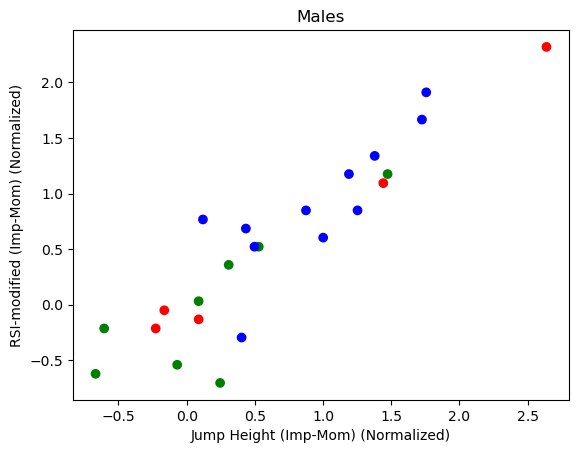

In [120]:
# Separate groups with colors
colordf = std_df.copy()
colordf.loc[colordf['Group'] == 1, 'Group'] = 'red'
colordf.loc[colordf['Group'] == 2, 'Group'] = 'green'
colordf.loc[colordf['Group'] == 3, 'Group'] = 'blue'
colordf.loc[colordf['Group'] == 4, 'Group'] = 'black'

# Filter out females
colordfmale = colordf[colordf['Male'] == 1]

# Print the scatterplot with the colors
plt.scatter(colordfmale['Jump Height (Imp-Mom) in Inches [in] '], colordfmale['RSI-modified (Imp-Mom) [m/s] '], c=colordfmale.Group)
plt.title("Males")
plt.xlabel("Jump Height (Imp-Mom) (Normalized)")
plt.ylabel("RSI-modified (Imp-Mom) (Normalized)")
plt.show()

### Women

In [121]:


# Open a file in write mode
with open('output.txt', 'a') as f:
    # Calculate top 6 athletes for each group
    top_athletes = {}
    women1_df = std_df[std_df['Male'] == 0]
    for group_num in range(1, 4):
        group = men1_df[men1_df['Group'] == group_num].copy()
        group['Score'] = group.apply(calculate_score, axis=1)
        top_athletes[f'Group_{group_num}'] = group.nlargest(6, 'Score')

    # Print top 6 athletes for each group
    for group_num, top_athletes_group in top_athletes.items():
        print(f'Top 6 female athletes for {group_num}:', file=f)
        for _, top_athlete in top_athletes_group.iterrows():
            print(f'\t{top_athlete["Name"]}', file=f)
        print('', file=f)



## Creating scatter plot of Jump Height (Imp-Mom) in Inches [in] vs RSI-modified (Imp-Mom) [m/s] as the have the highest weights and separating the groups with colors
## Females:

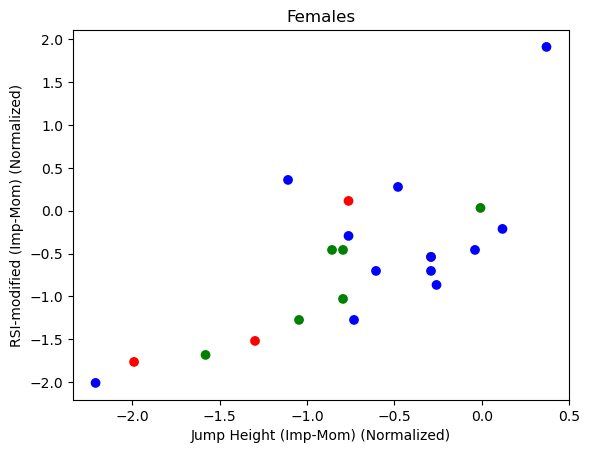

In [122]:
# Filter out females
colordffemale = colordf[colordf['Male'] == 0]

# Print the scatterplot with the colors
plt.scatter(colordffemale['Jump Height (Imp-Mom) in Inches [in] '], colordffemale['RSI-modified (Imp-Mom) [m/s] '], c=colordffemale.Group)
plt.title("Females")
plt.xlabel("Jump Height (Imp-Mom) (Normalized)")
plt.ylabel("RSI-modified (Imp-Mom) (Normalized)")
plt.show()

## Calcualting the best athlete in each stroke group

### Men

In [123]:
# Calculate top 5 athletes for each stroke group
top_athletes_stroke = {}
stroke_groups = ['Fly', 'Back', 'Breast', 'Free', 'IM']
for stroke in stroke_groups:
    group = men1_df[men1_df[stroke] == 1].copy()
    group['Score'] = group.apply(calculate_score, axis=1)
    top_athletes = group.nlargest(5, 'Score')
    top_athletes_stroke[stroke] = top_athletes

# Open the file in append mode
with open('output.txt', 'a') as f:
    # Print top 5 athletes for each stroke group
    for stroke, top_athletes in top_athletes_stroke.items():
        print(f'Top 5 male athletes for {stroke} stroke:', file=f)
        for idx, top_athlete in top_athletes.iterrows():
            athlete_name =  top_athlete["Name"]
            print(f'\t{idx + 1}. {athlete_name}', file=f)
        print('', file=f)


### Women

In [124]:
# Calculate top 5 athletes for each stroke group
top_athletes_stroke = {}
stroke_groups = ['Fly', 'Back', 'Breast', 'Free', 'IM']
for stroke in stroke_groups:
    group = women1_df[women1_df[stroke] == 1].copy()
    group['Score'] = group.apply(calculate_score, axis=1)
    top_athletes = group.nlargest(5, 'Score')
    top_athletes_stroke[stroke] = top_athletes

# Open the file in append mode
with open('output.txt', 'a') as f:
    # Print top 5 athletes for each stroke group
    for stroke, top_athletes in top_athletes_stroke.items():
        print(f'Top 5 female athletes for {stroke} stroke:', file=f)
        for idx, top_athlete in top_athletes.iterrows():
            athlete_name =  top_athlete["Name"]
            print(f'\t{idx + 1}. {athlete_name}', file=f)
        print('', file=f)


## Analysis ##
Defining new weights so we can compare each of the metrics equally to find out which is the most prominent.

In [125]:
weights_2 = {
    'Jump Height (Imp-Mom) in Inches [in] ': 0.125,
    'RSI-modified (Imp-Mom) [m/s] ': 0.125,
    'Eccentric Peak Force [N] ': 0.125,
    'Eccentric Peak Power / BM [W/kg] ': 0.125,
    'Eccentric Duration [ms] ': 0.125,
    'Concentric Peak Force [N] ': 0.125,
    'Concentric Peak Force / BM [N/kg] ': 0.125,
    'Concentric Duration [ms] ': 0.125,
}

## Calculating the most prominent metric for each stroke

In [126]:

# Assume df is your original DataFrame
# columns_to_normalize contains columns to standardize
columns_to_normalize = [col for col in df.columns if col not in ['Name', 'Male', 'Group', 'Fly', 'Back', 'Breast', 'Free', 'IM']]

# Create a copy of the DataFrame
std_df = df.copy()

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
std_df[columns_to_normalize] = scaler.fit_transform(std_df[columns_to_normalize])


In [127]:

# Calculate average score for each metric in each stroke group using the new weights
avg_scores_stroke_2 = {}
stroke_groups = ['Fly', 'Back', 'Breast', 'Free', 'IM']
for stroke in stroke_groups:
    group = std_df[std_df[stroke] == 1]
    avg_scores = {metric: group[metric].mean() * weight for metric, weight in weights_2.items()}
    dominant_metric = max(avg_scores, key=avg_scores.get)
    avg_scores_stroke_2[stroke] = (dominant_metric, avg_scores[dominant_metric])

# Open the file in append mode
with open('output.txt', 'a') as f:
    # Print the most dominant metric for each stroke group using the new weights
    for stroke, (metric, avg_score) in avg_scores_stroke_2.items():
        print(f'Most important metric for {stroke} stroke is {metric} with an average weighted score of {avg_score:.2f}', file=f)
        print('', file=f)
        
# Open the file in append mode
with open('output.txt', 'a') as f:
    # Print the description
    print('''This code calculates the average score for each metric in each stroke group 
by multiplying the metric's average value in the group by its weight.
It then identifies the most dominant metric for each group as the one with the highest average weighted score.''', file=f)
    print('', file=f)


This code calculates the average score for each metric in each stroke group by multiplying the metric's average value in the group by its weight. It then identifies the most dominant metric for each group as the one with the highest average weighted score.

## Calculating the most prominent metric for each group

In [128]:
# Calculate average score for each metric in each group using the new weights
avg_scores_groups = {}

for group_num in range(1, 4):
    group = std_df[std_df['Group'] == group_num]
    avg_scores = {metric: group[metric].mean() * weight for metric, weight in weights_2.items()}
    dominant_metric = max(avg_scores, key=avg_scores.get)
    avg_scores_groups[group_num] = (dominant_metric, avg_scores[dominant_metric])

# Open the file in append mode
with open('output.txt', 'a') as f:
    # Print the most dominant metric for each group using the new weights
    for group_num, (metric, avg_score) in avg_scores_groups.items():
        print(f'Most important metric for Group {group_num} is {metric} with an average weighted score of {avg_score:.2f}', file=f)
    print('', file=f)


## Calculating the Max, average and min for each metric for each group by gender
### Men

In [129]:
metric_stats = {}
men_df = df_original[df_original['Male'] == 1]

for group_num in range(1, 4):
    group = men_df[men_df['Group'] == group_num]
    group_stats = {}
    for metric in weights_2.keys():
        metric_max = group[metric].max()
        metric_min = group[metric].min()
        metric_avg = group[metric].mean()
        group_stats[metric] = {'max': metric_max, 'min': metric_min, 'avg': metric_avg}
    metric_stats[group_num] = group_stats

# Open the file in append mode
with open('output.txt', 'a') as f:
    print('Men stats by group', file=f)

    # Print the statistics for each metric in each group
    for group_num, group_stats in metric_stats.items():
        print(f'Group {group_num}:', file=f)
        for metric, stats in group_stats.items():
            print(f'\t{metric}:', file=f)
            print(f'\t\tMax: {stats["max"]:.2f}', file=f)
            print(f'\t\tMin: {stats["min"]:.2f}', file=f)
            print(f'\t\tAvg: {stats["avg"]:.2f}', file=f)
            print('', file=f)
        print('', file=f)


### Women

In [130]:
metric_stats = {}
women_df = df_original[df_original['Male'] == 0]

for group_num in range(1, 4):
    group = women_df[women_df['Group'] == group_num]
    group_stats = {}
    for metric in weights_2.keys():
        metric_max = group[metric].max()
        metric_min = group[metric].min()
        metric_avg = group[metric].mean()
        group_stats[metric] = {'max': metric_max, 'min': metric_min, 'avg': metric_avg}
    metric_stats[group_num] = group_stats

# Open the file in append mode
with open('output.txt', 'a') as f:
    print('Women stats by group', file=f)

    # Print the statistics for each metric in each group
    for group_num, group_stats in metric_stats.items():
        print(f'Group {group_num}:', file=f)
        for metric, stats in group_stats.items():
            print(f'\t{metric}:', file=f)
            print(f'\t\tMax: {stats["max"]:.2f}', file=f)
            print(f'\t\tMin: {stats["min"]:.2f}', file=f)
            print(f'\t\tAvg: {stats["avg"]:.2f}', file=f)
            print('', file=f)
        print('', file=f)


## Calculating the Max, average and min for each metric for each stroke by gender
### Men

In [131]:
stroke_groups = ['Fly', 'Back', 'Breast', 'Free', 'IM']

# Open the file in append mode
with open('output.txt', 'a') as f:
    print('Men stats by stroke', file=f)

    for stroke in stroke_groups:
        group = men_df[men_df[stroke] == 1]
        group_stats = {}
        for metric in weights_2.keys():
            metric_max = group[metric].max()
            metric_min = group[metric].min()
            metric_avg = group[metric].mean()
            group_stats[metric] = {'max': metric_max, 'min': metric_min, 'avg': metric_avg}
        metric_stats[stroke] = group_stats

        # Print the statistics for each metric in each group
        print(f'Stroke: {stroke}', file=f)
        for metric, stats in group_stats.items():
            print(f'\t{metric}:', file=f)
            print(f'\t\tMax: {stats["max"]:.2f}', file=f)
            print(f'\t\tMin: {stats["min"]:.2f}', file=f)
            print(f'\t\tAvg: {stats["avg"]:.2f}', file=f)
            print('', file=f)
        print('', file=f)


In [132]:
stroke_groups = ['Fly', 'Back', 'Breast', 'Free', 'IM']

# Open the file in append mode
with open('output.txt', 'a') as f:
    print('Women stats by stroke', file=f)

    for stroke in stroke_groups:
        group = women_df[women_df[stroke] == 1]
        group_stats = {}
        for metric in weights_2.keys():
            metric_max = group[metric].max()
            metric_min = group[metric].min()
            metric_avg = group[metric].mean()
            group_stats[metric] = {'max': metric_max, 'min': metric_min, 'avg': metric_avg}
        metric_stats[stroke] = group_stats

        # Print the statistics for each metric in each group
        print(f'Stroke: {stroke}', file=f)
        for metric, stats in group_stats.items():
            print(f'\t{metric}:', file=f)
            print(f'\t\tMax: {stats["max"]:.2f}', file=f)
            print(f'\t\tMin: {stats["min"]:.2f}', file=f)
            print(f'\t\tAvg: {stats["avg"]:.2f}', file=f)
            print('', file=f)
        print('', file=f)
